In [63]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [67]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing import image

In [69]:
# 이미지 크기 및 배치 크기 설정
img_height = 180
img_width = 180
batch_size = 32

In [71]:
cd Ai_test

[WinError 2] 지정된 파일을 찾을 수 없습니다: 'Ai_test'
C:\Users\hongj\Ai_test


In [73]:
# 학습용 데이터셋 로드
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./image_data/",  # 이미지 폴더 경로
  validation_split=0.2,  # 20%는 검증용 데이터로 사용
  subset="training",  # 학습용 데이터로 설정
  seed=123,  # 랜덤 시드 고정
  image_size=(img_height, img_width),  # 이미지 크기 조정
  batch_size=batch_size  # 배치 크기 설정
)

Found 503 files belonging to 5 classes.
Using 403 files for training.


In [75]:
# 검증용 데이터셋 로드
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./image_data/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 503 files belonging to 5 classes.
Using 100 files for validation.


In [77]:
class_names = train_ds.class_names
print(class_names)  # 예시 출력: ['cats', 'dogs']


['cans', 'glass', 'other_ps', 'p_bowls', 'pets']


In [79]:
# 데이터 증강 레이어
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE

# 학습 데이터셋 캐시 및 프리페치
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# 검증 데이터셋 프리페치
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

C:\Users\hongj\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
# 모델 정의
model = tf.keras.Sequential([
  data_augmentation,  # 데이터 증강
  layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),  # 첫 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu',padding='same'),  # 두 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),  # 세 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),  # 네 번째 Convolution 층
  layers.MaxPooling2D(),
  layers.Flatten(),  # 2D 데이터를 1D로 변환
  layers.Dense(256, activation='relu'),  # Fully Connected Layer
  layers.Dropout(0.6), #드롭아웃 0%적용
  layers.Dense(len(class_names), activation='softmax')  # 출력층
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  
    restore_best_weights=True
)

In [139]:
history = model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 507ms/step - accuracy: 0.2441 - loss: 126.2266 - val_accuracy: 0.2300 - val_loss: 1.5106
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 520ms/step - accuracy: 0.2964 - loss: 1.5481 - val_accuracy: 0.4000 - val_loss: 1.3931
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - accuracy: 0.3408 - loss: 1.5192 - val_accuracy: 0.3900 - val_loss: 1.4360
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 505ms/step - accuracy: 0.3364 - loss: 1.4577 - val_accuracy: 0.4200 - val_loss: 1.4276
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step - accuracy: 0.3834 - loss: 1.4732 - val_accuracy: 0.4000 - val_loss: 1.2926
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.4524 - loss: 1.2406 - val_accuracy: 0.4200 - val_loss: 1.2764
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 510ms/step - accuracy: 0.4107 - loss: 1.3483 - val_accuracy: 0.4800 - val_loss: 1.2012
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.4015 - loss: 1.3878 - val_ac

In [141]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       7,930,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,959,441 (95.21 MB)

 Trainable params: 8,319,813 (31.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,639,628 (63.48 MB)

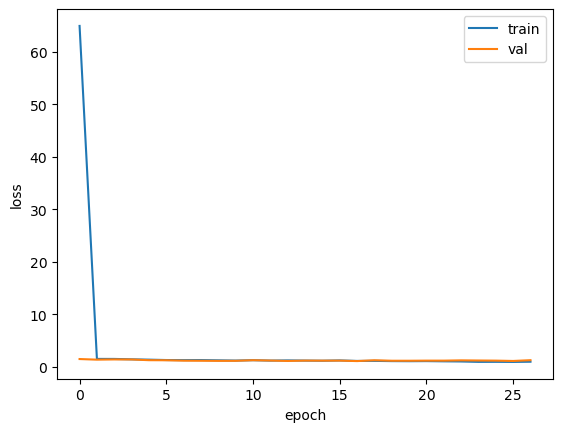

In [143]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

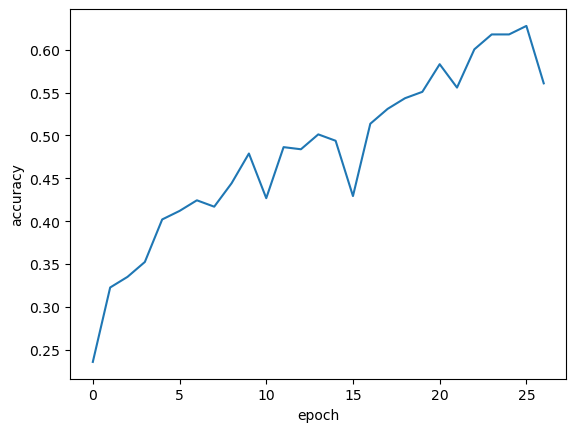

In [145]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [147]:
# 검증 정확도 확인
loss, accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5407 - loss: 1.1443 
Validation accuracy: 0.5600000023841858


In [149]:
# 새로운 이미지 예측
img = image.load_img('C:/Users/hongj/Ai_test/Classification_Image/유리병1.jfif', target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # 배치 차원 추가
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f"Predicted class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: other_ps
